In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from glob import glob
import datetime

### TEP - Resampling datasets - Threshold method

In [2]:
def print_new_samples(fault):
    percentages = [5,10,20,30,40,50,60,70,80,90,95]
    paths = glob('d*_te.dat')
    dfs = {}
    columns_name = ['Variable_' + str(x) for x in range(1,53)]
    for mov in range(0,len(paths)):
        data = np.genfromtxt(paths[mov])
        dfs[mov] = pd.DataFrame(data=data,columns=columns_name) 
    
    for p in percentages:
        for v in range(1,53): 

                max_v1 = dfs[0].iloc[:,v-1].max()
                mean_v1 = dfs[0].iloc[:,v-1].mean()
                min_v1 = dfs[0].iloc[:,v-1].min()

                        # Percentage UP AND DOWN THE MEAN

                mean_up = mean_v1+((p/100)*abs(max_v1-mean_v1))
                mean_down = mean_v1-((p/100)*abs(min_v1-mean_v1))
                
                


                index1 = dfs[fault][dfs[fault]['Variable_' + str(v)].between(mean_down,mean_up)].index
                
                
                dfs[fault].loc[index1,'Variable_' + str(v)] = mean_v1
        dfs[fault].to_csv('NEW_'+str(p)+'_d0'+str(fault)+'_te.dat',sep=" ",index=False, header=False)

In [3]:
for x in range(1,22):
    
    print_new_samples(x)

### Testing the generated files

In [2]:
pathsm = glob('NEW_95_d*_te.dat')
pathsm

['NEW_95_d00_te.dat',
 'NEW_95_d010_te.dat',
 'NEW_95_d011_te.dat',
 'NEW_95_d012_te.dat',
 'NEW_95_d013_te.dat',
 'NEW_95_d014_te.dat',
 'NEW_95_d015_te.dat',
 'NEW_95_d016_te.dat',
 'NEW_95_d017_te.dat',
 'NEW_95_d018_te.dat',
 'NEW_95_d019_te.dat',
 'NEW_95_d01_te.dat',
 'NEW_95_d020_te.dat',
 'NEW_95_d021_te.dat',
 'NEW_95_d02_te.dat',
 'NEW_95_d03_te.dat',
 'NEW_95_d04_te.dat',
 'NEW_95_d05_te.dat',
 'NEW_95_d06_te.dat',
 'NEW_95_d07_te.dat',
 'NEW_95_d08_te.dat',
 'NEW_95_d09_te.dat']

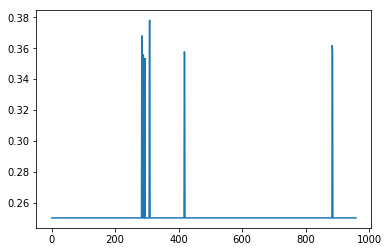

In [3]:
pathsm = glob('NEW_95_d*_te.dat')
modified = {}
columns_name = range(1,53)
for mov in range(0,len(pathsm)):
    data = np.genfromtxt(pathsm[mov])
    modified[mov] = pd.DataFrame(data=data,columns=columns_name)    
plt.plot(modified[14].iloc[:,0])
plt.show()

In [10]:
paths = glob('d*_te.dat')
paths

['d00_te.dat',
 'd01_te.dat',
 'd02_te.dat',
 'd03_te.dat',
 'd04_te.dat',
 'd05_te.dat',
 'd06_te.dat',
 'd07_te.dat',
 'd08_te.dat',
 'd09_te.dat',
 'd10_te.dat',
 'd11_te.dat',
 'd12_te.dat',
 'd13_te.dat',
 'd14_te.dat',
 'd15_te.dat',
 'd16_te.dat',
 'd17_te.dat',
 'd18_te.dat',
 'd19_te.dat',
 'd20_te.dat',
 'd21_te.dat']

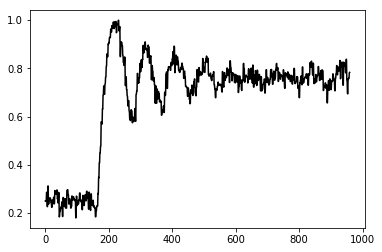

In [119]:
paths = glob('d*_te.dat')
original = {}
columns_name = range(1,53)
for mov in range(0,22):
    data = np.genfromtxt(paths[mov])
    original[mov] = pd.DataFrame(data=data,columns=columns_name)    
plt.plot(original[1].iloc[:,0],'k')
plt.show()

### TEP - Resampling datasets - Delta method

In [13]:
def print_new_samples_delta(fault):
    #percentages = [5,10,20,30,40,50,60,70,80,90,95]
    percentages = [5,10,20,40,60,80,90,95]
    paths = glob('d*_te.dat')
    dfs = {}
    columns_name = ['Variable_' + str(x) for x in range(1,53)]
    for mov in range(0,len(paths)):
        data = np.genfromtxt(paths[mov])
        dfs[mov] = pd.DataFrame(data=data,columns=columns_name)
   
    for p in percentages:
        
        delta = np.zeros((960,52))                          # Initiate delta sample per sample, 960 total samples
        m_delta = np.zeros((1,52))                          # Initiate max delta for normal operation, 52 total variables
        compress = np.zeros((1,52))                        # Initiate compression rate
        
        for v in range(0,52):                               # "For" all 52 variables of normal operation
            for d in range(0,dfs[0].shape[0]-1):            # "For" all samples
                
                delta[d,v] = abs(dfs[0].iloc[d,v]-dfs[0].iloc[d+1,v])  # Calculate all deltas sample per sample
            m_delta[0,v] = max(delta[:,v])              #Calculate the biggest delta in normal operation and store
            
        for v in range(0,52):                               # "For" all 52 variables of each fault
            count = 0
            for d in range(0,dfs[0].shape[0]-1):            # "For" all samples
                
                if abs(dfs[fault].iloc[d,v]-dfs[fault].iloc[d+1,v]) < ((p/100)*m_delta[0,v]): #Calculate per sample fault
                    dfs[fault].iloc[d+1,v] = dfs[fault].iloc[d,v]
                    count += 1
            compress[0,v] =  count/960                       # Compression rate for 'v' variable
    
        dfs[fault].to_csv('DEL_'+str(p)+'_d0'+str(fault)+'_te.dat',sep=" ",index=False, header=False)
    #return(compress)        #Uncomment this if you want to vizualize compression rate

In [102]:
for x in range(1,22):
    
    print_new_samples_delta(x)

[[0.821875   0.76458333 0.73020833 0.73854167 0.66770833 0.66458333
  0.57604167 0.71875    0.634375   0.82291667 0.559375   0.725
  0.54895833 0.72916667 0.765625   0.59166667 0.62083333 0.51458333
  0.60208333 0.60729167 0.67083333 0.63333333 0.82708333 0.803125
  0.815625   0.8875     0.784375   0.82916667 0.875      0.828125
  0.81979167 0.83854167 0.803125   0.78333333 0.89375    0.83541667
  0.94583333 0.89166667 0.89583333 0.93229167 0.925      0.81875
  0.71875    0.81458333 0.678125   0.65625    0.81666667 0.725
  0.765625   0.54270833 0.7375     0.62916667]]


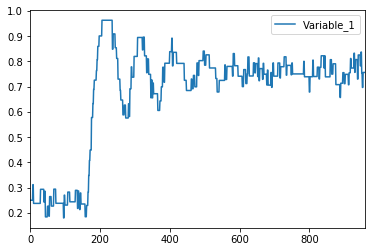

In [80]:
di,com=print_new_samples_delta(1)
#lol=pd.DataFrame(di)
di.plot(y='Variable_1')
print(com)

### Testing

In [111]:
pathsm = glob('DEL_95_d*_te.dat')
pathsm

['DEL_95_d010_te.dat',
 'DEL_95_d011_te.dat',
 'DEL_95_d012_te.dat',
 'DEL_95_d013_te.dat',
 'DEL_95_d014_te.dat',
 'DEL_95_d015_te.dat',
 'DEL_95_d016_te.dat',
 'DEL_95_d017_te.dat',
 'DEL_95_d018_te.dat',
 'DEL_95_d019_te.dat',
 'DEL_95_d01_te.dat',
 'DEL_95_d020_te.dat',
 'DEL_95_d021_te.dat',
 'DEL_95_d02_te.dat',
 'DEL_95_d03_te.dat',
 'DEL_95_d04_te.dat',
 'DEL_95_d05_te.dat',
 'DEL_95_d06_te.dat',
 'DEL_95_d07_te.dat',
 'DEL_95_d08_te.dat',
 'DEL_95_d09_te.dat']

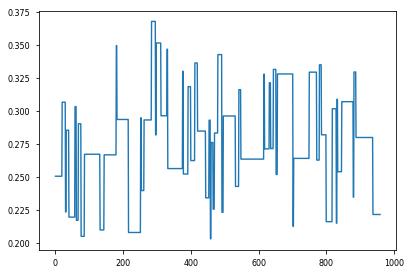

In [104]:
pathsm = glob('DEL_40_d*_te.dat')
modified = {}
columns_name = range(1,53)
for mov in range(0,len(pathsm)):
    data = np.genfromtxt(pathsm[mov])
    modified[mov] = pd.DataFrame(data=data,columns=columns_name)    
plt.plot(modified[13].iloc[:,0])
plt.show()

In [109]:
paths = glob('d*_te.dat')
paths[10]

'd10_te.dat'

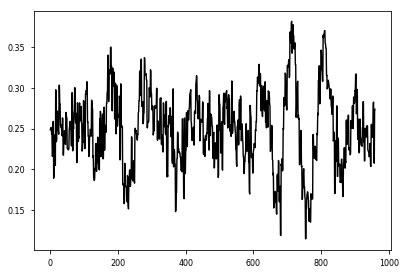

In [98]:
paths = glob('d*_te.dat')
original = {}
columns_name = range(1,53)
for mov in range(0,22):
    data = np.genfromtxt(paths[mov])
    original[mov] = pd.DataFrame(data=data,columns=columns_name)    
plt.plot(original[10].iloc[:,0],'k')
plt.show()

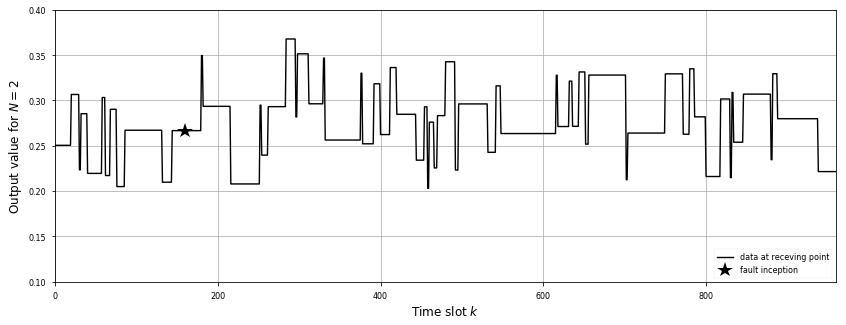

In [108]:
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 12

plt.figure(figsize=(14,5))

plt.plot(modified[13].iloc[:,0],'k',label='data at receving point')
#plt.plot(plot_x,plot_yu,'k--')
#plt.plot(plot_x,plot_yd,'k--')
plt.plot(160,modified[13].iloc[160,0], 'k*',markersize=16,label='fault inception')
plt.axis([0, 960,0.1, 0.4])
plt.legend(loc='lower right')
plt.xlabel('Time slot $k$')
plt.ylabel('Output value for $N = 2$')
plt.grid()
plt.savefig('event-driven2.pdf', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.show()

### Samples per time slot

In [14]:
diy,slot=print_new_samples_delta(1)

In [31]:
(1-diy.mean(axis=1)[0])*52


1.046874999999984

In [42]:
#def print_new_samples_delta1(fault):
    #percentages = [5,10,20,40,60,80,90,95]
for fault in range(1,22):
    percentages = [5,10,20,40,60,80,90,95]
    paths = glob('d*_te.dat')
    dfs = {}
    avg = np.zeros((8,21))
    columns_name = ['Variable_' + str(x) for x in range(1,53)]
    for mov in range(0,len(paths)):
        data = np.genfromtxt(paths[mov])
        dfs[mov] = pd.DataFrame(data=data,columns=columns_name)
    con = 0    
    for p in percentages:
        
        delta = np.zeros((960,52))                          # Initiate delta sample per sample, 960 total samples
        m_delta = np.zeros((1,52))                          # Initiate max delta for normal operation, 52 total variables
        compress = np.zeros((1,52))                        # Initiate compression rate
        trans = np.ones((52,960)) 
        
        for v in range(0,52):                               # "For" all 52 variables of normal operation
            for d in range(0,dfs[0].shape[0]-1):            # "For" all samples
                
                delta[d,v] = abs(dfs[0].iloc[d,v]-dfs[0].iloc[d+1,v])  # Calculate all deltas sample per sample
            m_delta[0,v] = max(delta[:,v])              #Calculate the biggest delta in normal operation and store
            
        for v in range(0,52):                               # "For" all 52 variables of each fault
            count = 0
            for d in range(0,dfs[0].shape[0]-1):            # "For" 960 all samples
                
                if abs(dfs[fault].iloc[d,v]-dfs[fault].iloc[d+1,v]) < ((p/100)*m_delta[0,v]):#Calculate per sample fault
                    dfs[fault].iloc[d+1,v] = dfs[fault].iloc[d,v]
                    count += 1
                    trans[v,d] =  0  
            compress[0,v] =  count/960                       # Compression rate for 'v' variable
    
        avg[con,fault-1] = trans.sum().mean()
        con += 1
    compress = pd.DataFrame(compress)
    trans = pd.DataFrame(trans)
    
    #return(compress,trans)        #Uncomment this is you want to vizualize compression rate

In [43]:
pd.DataFrame(avg)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31636.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26296.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17034.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5976.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1357.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0


In [38]:
trans.sum().mean()

50.953125

In [95]:
Ye = [6533/960,6873/960,7734/960,10913/960,10913/960,17893/960,31026/960,39997/960,49920/960]
eX = ['95','90','80','60','40','20','10','05','0']

No handles with labels found to put in legend.


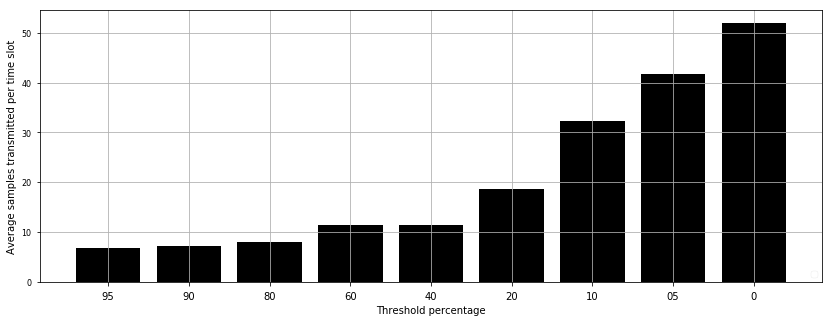

In [91]:
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 10
plt.figure(figsize=(14,5))
matplotlib.pyplot.xticks(fontsize=10)
#graph,index,plot_x,plot_yu,plot_yd = tennessee_resampling('d*_te.dat',variable,fault,percentage)
plt.bar(eX,Ye,color='black')
#plt.plot(plot_x,plot_yu,'k--')
#plt.plot(plot_x,plot_yd,'k--')
#plt.plot(160,graph.iloc[160,variable-1], 'k*',markersize=16,label='fault inception')
#plt.axis([0, 960,0.1, 0.4])
plt.legend(loc='lower right')
plt.xlabel('Threshold percentage')
plt.ylabel('Average samples transmitted per time slot')
plt.grid()
plt.savefig('bar1.pdf', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.show()

In [92]:
Ye = [233/960,266/960,414/960,1357/960,5976/960,17034/960,26296/960,31636/960,49920/960]
eX = ['0','05','10','20','40','60','80','90','95']

In [96]:
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 15
lul = [(1-(x/52))*100 for x in Ye]
eX = ['95','90','80','60','40','20','10','05','0']

No handles with labels found to put in legend.


AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

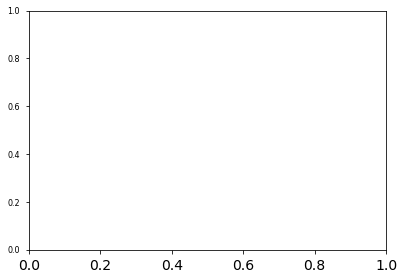

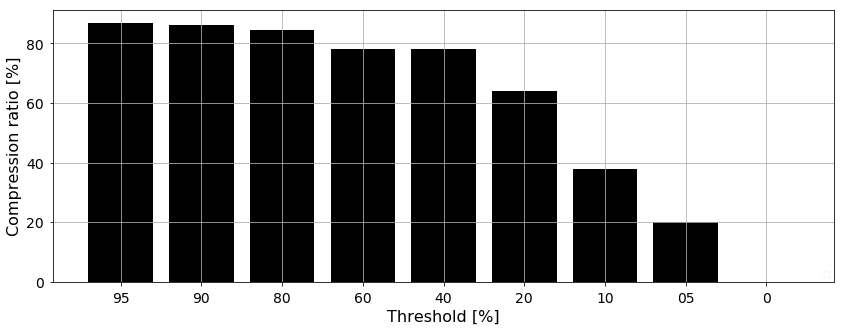

In [97]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-paper')
plt.rcParams["axes.labelsize"] = 30
matplotlib.pyplot.xticks(fontsize=14)

plt.figure(figsize=(14,5))
#graph,index,plot_x,plot_yu,plot_yd = tennessee_resampling('d*_te.dat',variable,fault,percentage)
plt.bar(eX,lul,color='black')
matplotlib.pyplot.xticks(fontsize=14)
matplotlib.pyplot.yticks(fontsize=14)
#plt.plot(plot_x,plot_yu,'k--')
#plt.plot(plot_x,plot_yd,'k--')
#plt.plot(160,graph.iloc[160,variable-1], 'k*',markersize=16,label='fault inception')
#plt.axis([0, 960,0.1, 0.4])
plt.legend(loc='lower right')
plt.xlabel('Threshold [%]',fontsize=16)
plt.ylabel('Compression ratio [%]',fontsize=16)
plt.grid()
plt.savefig('compress1.pdf', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.label.set_fontsize(14) 
plt.show()